In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Dados genéticos

Vamos trabalhar com dados de mutações de nucleotídeo único (https://en.wikipedia.org/wiki/Single-nucleotide_polymorphism), muito utilizadas para determinar origem genética. No nosso exemplo simplificado,
assumimos 2 possibilidades: 0 = mutação ausente e 1 = mutação presente. Como cada ponto aparece em 2 cromossomos, ao todo podemos ter 0, 1 ou duas mutações por posição no DNA.

In [ ]:
# Criamos dados sintéticos
tamanho = 3
n_pontos = 10
formato = (tamanho, n_pontos)

# Criamos "indivíduos" artificiais
d1 = np.random.randint(0, 3, size=formato)
d2 = np.random.randint(0, 2, size=formato)
d3 = np.random.randint(0, 2, size=formato) + 1
d4 = np.random.randint(0, 2, size=formato) * 2

# np.vstack junta uma lista de tabelas colocandoa-as uma em cima da outra
dados = np.vstack([d1, d2, d3, d4])

# Verificamos o formato dos dados
print(f'Tamanhos: d1={d1.shape}, d2={d2.shape}, d2={d4.shape}, d4={d4.shape}, dados={dados.shape}')

In [ ]:
# Observamos os dados brutos...
dados

## Redução de dimensionalidade

In [ ]:
dimensoes = 2
pca = PCA(dimensoes).fit(dados)
dados_2d = pca.transform(dados)

print('Formato:', dados_2d.shape)

## Gráficos

Vamos apresentar os dados no formato de um gráfico "scatter"

In [ ]:
X, Y = dados_2d.T

plt.scatter(X, Y, label='dados')
plt.legend()
plt.show()

### Várias populações

In [ ]:
def mostra_populacoes(pops):
    for i, pop in enumerate(pops):
        # Implemente como mostrar a população pop na posição i da lista
        X, Y = dados_2d.T
        plt.scatter(X, Y, label='dados')
    
    plt.legend()
    plt.show()
        
mostra_populacoes([d1, d2, d3, d4])

## Dados reais

Vamos carregar o banco de dados com dados reais de pesquisa genética.

In [40]:
url = 'https://raw.githubusercontent.com/fabiommendes/desenvolvimento-de-software/master/dados/populations.csv'
df = pd.read_csv(url, index_col=0)
df

,continent,rs2307666,rs1610863,rs16635,rs1610965,rs35451359,rs140837,rs1160893,rs2308203,rs33974167,...,rs2307998,rs2307803,rs2307930,rs25630,rs2307582,rs2307922,rs11267926,rs25584,rs2307799,rs34541393
sample id,,,,,,,,,,,,,,,,,,,,,
HGDP00452,Africa,2.0,2.0,0.0,0.0,2.0,1.0,2.0,2.0,0.0,...,1.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0
HGDP00453,Africa,1.0,0.0,1.0,1.0,2.0,1.0,2.0,2.0,0.0,...,0.0,1.0,0.0,2.0,2.0,2.0,1.0,0.0,2.0,2.0
HGDP00454,Africa,2.0,2.0,0.0,2.0,2.0,2.0,0.0,2.0,1.0,...,0.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
HGDP00455,Africa,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0
HGDP00457,Africa,2.0,0.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,...,0.0,1.0,0.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0
HGDP00458,Africa,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,1.0,1.0,1.0,2.0,2.0,2.0,2.0,0.0,2.0,0.0
HGDP00459,Africa,2.0,2.0,0.0,2.0,1.0,1.0,2.0,2.0,1.0,...,0.0,1.0,0.0,2.0,1.0,2.0,2.0,0.0,2.0,2.0
HGDP00460,Africa,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,0.0,...,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0
HGDP00461,Africa,1.0,0.0,0.0,2.0,0.0,2.0,1.0,2.0,1.0,...,0.0,2.0,0.0,2.0,1.0,2.0,2.0,0.0,2.0,1.0


In [42]:
continentes = df.pop('continent')

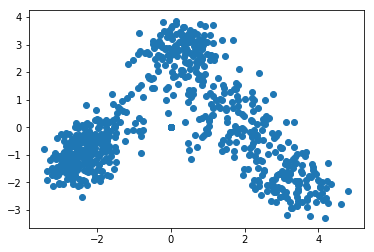

In [43]:
dados = df.fillna(df.mean()).values
pca = PCA(2).fit(dados)

X, Y = pca.transform(dados).T
plt.scatter(X, Y)
plt.show()

In [53]:
cores = {
    'Africa': 'red', 
    'Europe': 'blue', 
    'Asia': 'orange', 
    'America': 'green', 
    'Quilombo': 'gray',
}

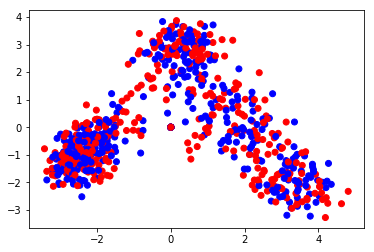

In [54]:
lst_cores = (['red', 'blue'] * 500)[:739]
plt.scatter(X, Y, color=lst_cores)
plt.show()